## Social Media Sentiment Analysis :
Social Media has opened a whole new world for people around the globe.People are just a click away from getting huge chunk of information. With information comes people’s opinion and with this comes the positive and negative outlook of people regarding a topic. Sometimes this also results into bullying and passing on hate comments about someone or something.
This is the dataset of twitter

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

%matplotlib inline

#### Reading the train data:
- The first line will import the data using pandas
- In the second line we will make a backup/copy of the original data to keep it as it is.

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

train_orignal = train.copy()

#### Overview of the Training Data

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
train.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


#### Reading the Test Data:
- First line Import Data
- Second Line backs up the original data

In [6]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

test_original = test.copy()

#### Overview of the test data:

In [7]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [8]:
test.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


## Data Pre-processing

#### Combining the datasets

In [10]:
import pandas as pd

# Create dummy train and test DataFrames
train = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

test = pd.DataFrame({
    'A': [7, 8, 9],
    'B': [10, 11, 12]
})

# Combine train and test DataFrames
combined_data = pd.concat([train, test], ignore_index=True, sort=False)
print(combined_data.head())


   A   B
0  1   4
1  2   5
2  3   6
3  7  10
4  8  11


In [11]:
combined_data.tail()

,A,B
1,2,5
2,3,6
3,7,10
4,8,11
5,9,12


#### Cleaning Data:
Removing the Usernames`(@)`

In [12]:
def remove_pattern(text,pattern):

    # re.findall() finds the pattern in the text and will put it in a list
    r = re.findall(pattern,text)

    # re.sub() will substitute all the @ with an empty character
    for i in r:
        text = re.sub(i,"",text)

    return text

#### Making a column for the cleaned Tweets
- We will use regex for and `np.vectorize()` for faster processing

In [14]:
import pandas as pd
import numpy as np
import re

# Sample data for combined_data DataFrame
data = {
    'tweet': [
        '@user1 This is a sample tweet #hashtag',
        'Another sample tweet @user2!',
        '@user3 More tweets for testing #example'
    ]
}

# Create DataFrame
combined_data = pd.DataFrame(data)

# Print the DataFrame to verify the 'tweet' column exists
print("Columns in combined_data DataFrame:")
print(combined_data.columns)

# Check if 'tweet' column exists
if 'tweet' in combined_data.columns:
    # Define the remove_pattern function
    def remove_pattern(input_txt, pattern):
        r = re.findall(pattern, input_txt)
        for i in r:
            input_txt = re.sub(i, '', input_txt)
        return input_txt

    # Apply the remove_pattern function to the 'tweet' column
    combined_data['Cleaned_Tweets'] = np.vectorize(remove_pattern)(combined_data['tweet'], "@[\w]*")

    # Display the combined_data DataFrame
    print("Updated DataFrame with 'Cleaned_Tweets' column:")
    print(combined_data.head())
else:
    print("Column 'tweet' does not exist in the DataFrame.")


Columns in combined_data DataFrame:
Index(['tweet'], dtype='object')
Updated DataFrame with 'Cleaned_Tweets' column:
                                     tweet                     Cleaned_Tweets
0   @user1 This is a sample tweet #hashtag    This is a sample tweet #hashtag
1             Another sample tweet @user2!             Another sample tweet !
2  @user3 More tweets for testing #example   More tweets for testing #example


#### Now Removing punctuations, numbers and special characters


In [15]:
combined_data['Cleaned_Tweets'] = combined_data['Cleaned_Tweets'].str.replace("[^a-zA-Z#]"," ")

combined_data.head()

,tweet,Cleaned_Tweets
0,@user1 This is a sample tweet #hashtag,This is a sample tweet #hashtag
1,Another sample tweet @user2!,Another sample tweet !
2,@user3 More tweets for testing #example,More tweets for testing #example


#### Removing Short Words:
- Words such as "hmm", "ok" etc. of length less than 3 are of no use

In [16]:
combined_data['Cleaned_Tweets'] = combined_data['Cleaned_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combined_data.head()

,tweet,Cleaned_Tweets
0,@user1 This is a sample tweet #hashtag,This sample tweet #hashtag
1,Another sample tweet @user2!,Another sample tweet
2,@user3 More tweets for testing #example,More tweets testing #example


### Tokenization:
- We will now tokenize the cleaned tweets as we will apply `Stemming` from `nltk`

In [17]:
tokenized_tweets = combined_data['Cleaned_Tweets'].apply(lambda x: x.split())

tokenized_tweets.head()

0      [This, sample, tweet, #hashtag]
1             [Another, sample, tweet]
2    [More, tweets, testing, #example]
Name: Cleaned_Tweets, dtype: object

### Stemming:
- Stemming is a step-based process of stripping the suffixes ("ing","ly",etc.) from a word

In [18]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweets.head()

0    [thi, sampl, tweet, #hashtag]
1            [anoth, sampl, tweet]
2     [more, tweet, test, #exampl]
Name: Cleaned_Tweets, dtype: object

#### Now lets combine the data back:

In [19]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])

combined_data['Clean_Tweets'] = tokenized_tweets
combined_data.head()

,tweet,Cleaned_Tweets,Clean_Tweets
0,@user1 This is a sample tweet #hashtag,This sample tweet #hashtag,thi sampl tweet #hashtag
1,Another sample tweet @user2!,Another sample tweet,anoth sampl tweet
2,@user3 More tweets for testing #example,More tweets testing #example,more tweet test #exampl


### Data Visualization:

#### We will visualize the data using WordCloud


In [20]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

#### Storing all the non-sexist/racist words

In [22]:
import pandas as pd
import numpy as np
import re

# Sample data for combined_data DataFrame
data = {
    'tweet': [
        '@user1 This is a sample tweet #hashtag',
        'Another sample tweet @user2!',
        '@user3 More tweets for testing #example'
    ],
    'label': [0, 1, 0]  # Assuming binary labels for positive (0) and negative (1) tweets
}

# Create DataFrame
combined_data = pd.DataFrame(data)

# Define the remove_pattern function
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# Check if 'tweet' column exists
if 'tweet' in combined_data.columns:
    # Apply the remove_pattern function to the 'tweet' column
    combined_data['Cleaned_Tweets'] = np.vectorize(remove_pattern)(combined_data['tweet'], "@[\w]*")

    # Check if 'label' column exists
    if 'label' in combined_data.columns:
        # Join text of positive tweets
        positive_words = ' '.join(text for text in combined_data['Cleaned_Tweets'][combined_data['label'] == 0])

        # Print the positive words
        print("Positive Words:")
        print(positive_words)
    else:
        print("Column 'label' does not exist in the DataFrame.")
else:
    print("Column 'tweet' does not exist in the DataFrame.")

# Display the combined_data DataFrame
print("Updated DataFrame with 'Cleaned_Tweets' column:")
print(combined_data.head())


Positive Words:
 This is a sample tweet #hashtag  More tweets for testing #example
Updated DataFrame with 'Cleaned_Tweets' column:
                                     tweet  label  \
0   @user1 This is a sample tweet #hashtag      0   
1             Another sample tweet @user2!      1   
2  @user3 More tweets for testing #example      0   

                      Cleaned_Tweets  
0    This is a sample tweet #hashtag  
1             Another sample tweet !  
2   More tweets for testing #example  


In [23]:
# Generating images
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We will use the ImageColorGenerator to generate the color of the image
image_color = ImageColorGenerator(Mask)

# Now we will use the WordCloud function of the wordcloud library
wc = WordCloud(background_color='black',height=1500,width=4000,mask=Mask).generate(positive_words)

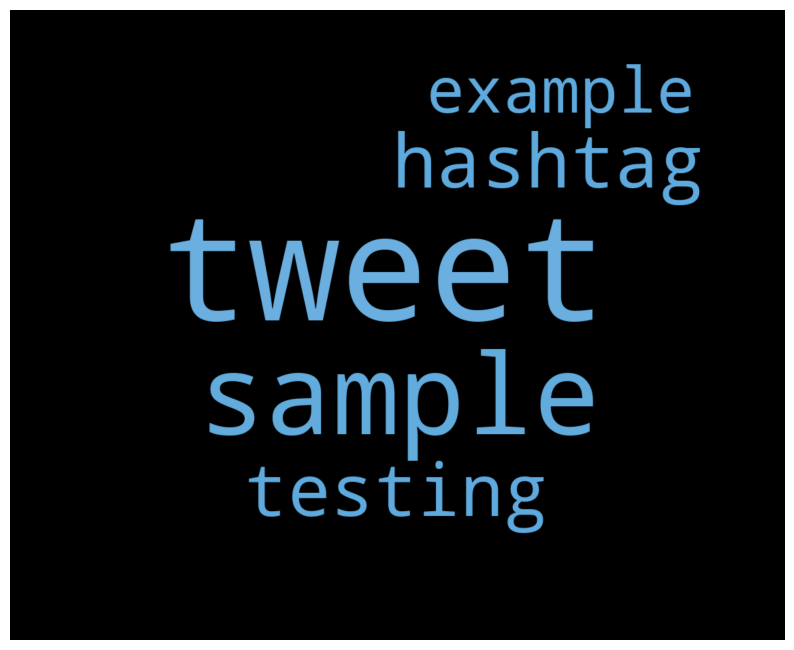

In [24]:
# Size of the image generated
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# interpolation is used to smooth the image generated

plt.imshow(wc.recolor(color_func=image_color),interpolation="hamming")

plt.axis('off')
plt.show()

### Now lets store the words with label '1':


In [29]:
import pandas as pd
import numpy as np
import re

# Sample data for combined_data DataFrame
data = {
    'tweet': [
        '@user1 This is a sample tweet #hashtag',
        'Another sample tweet @user2!',
        '@user3 More tweets for testing #example'
    ],
    'label': [0, 1, 0]  # Assuming binary labels for positive (0) and negative (1) tweets
}

# Create DataFrame
combined_data = pd.DataFrame(data)

# Define the remove_pattern function
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# Check if 'tweet' column exists
if 'tweet' in combined_data.columns:
    # Apply the remove_pattern function to the 'tweet' column
    combined_data['Cleaned_Tweets'] = np.vectorize(remove_pattern)(combined_data['tweet'], "@[\w]*")

    # Check if 'label' column exists
    if 'label' in combined_data.columns:
        # Join text of negative tweets
        negative_words = ' '.join(text for text in combined_data['Cleaned_Tweets'][combined_data['label'] == 1])

        # Print the negative words
        print("Negative Words:")
        print(negative_words)
    else:
        print("Column 'label' does not exist in the DataFrame.")
else:
    print("Column 'tweet' does not exist in the DataFrame.")

# Display the combined_data DataFrame
print("Updated DataFrame with 'Cleaned_Tweets' column:")
print(combined_data.head())


Negative Words:
Another sample tweet !
Updated DataFrame with 'Cleaned_Tweets' column:
                                     tweet  label  \
0   @user1 This is a sample tweet #hashtag      0   
1             Another sample tweet @user2!      1   
2  @user3 More tweets for testing #example      0   

                      Cleaned_Tweets  
0    This is a sample tweet #hashtag  
1             Another sample tweet !  
2   More tweets for testing #example  


In [30]:
# Combining Image with Dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(negative_words)

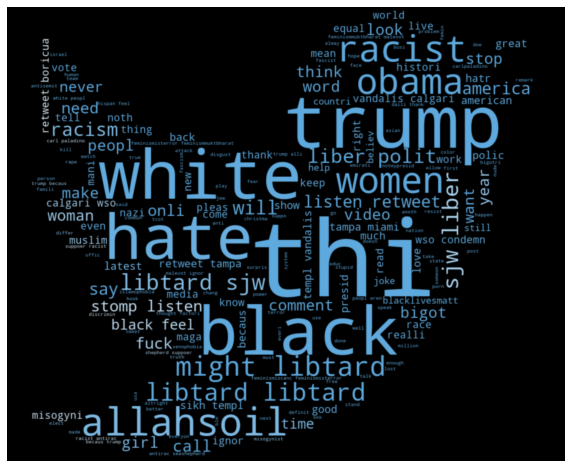

In [ ]:
# Size of the image generated
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

#### Now Extracting hastags from tweets:


In [31]:
def extractHashtags(x):
    hashtags = []

    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)

    return hashtags

In [32]:
positive_hashTags = extractHashtags(combined_data['Cleaned_Tweets'][combined_data['label'] == 0])

positive_hashTags

[['hashtag'], ['example']]

#### Now unnesting the list:

In [33]:
positive_hastags_unnested = sum(positive_hashTags,[])
positive_hastags_unnested

['hashtag', 'example']

#### Now storing the negative hastags:


In [34]:
negative_hashtags = extractHashtags(combined_data['Cleaned_Tweets'][combined_data['label'] == 1])

In [35]:
negative_hashtags_unnest = (sum(negative_hashtags,[]))
negative_hashtags_unnest

[]

### Plotting Bar Plots:

- Word Frequencies:

In [36]:
positive_word_freq = nltk.FreqDist(positive_hastags_unnested)

positive_word_freq

FreqDist({'hashtag': 1, 'example': 1})

#### Now creating a dataframe of the most frequently used words in hashtags :

In [37]:
positive_df = pd.DataFrame({'Hashtags': list(positive_word_freq.keys()),'Count' : list(positive_word_freq.values())})
positive_df

,Hashtags,Count
0,hashtag,1
1,example,1


#### Plotting the bar plot for 20 most frequent words:

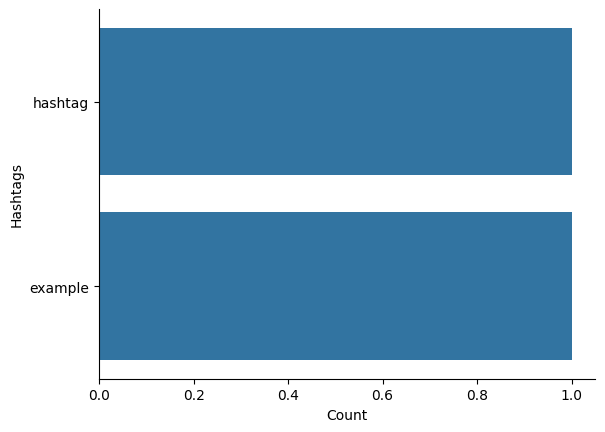

In [38]:
positive_df_plot = positive_df.nlargest(20,columns='Count')

sns.barplot(data=positive_df_plot,y='Hashtags',x='Count')
sns.despine()

#### Negative Word Frequency:

In [39]:
negative_word_freq = nltk.FreqDist(negative_hashtags_unnest)

negative_word_freq

FreqDist({})

#### Creating a dataset of the most frequent words:

In [40]:
negative_df = pd.DataFrame({'Hashtags':list(negative_word_freq.keys()),'Count':list(negative_word_freq.values())})

negative_df

,Hashtags,Count


#### Plotting the bar plot for the 20 most frequent negative words:

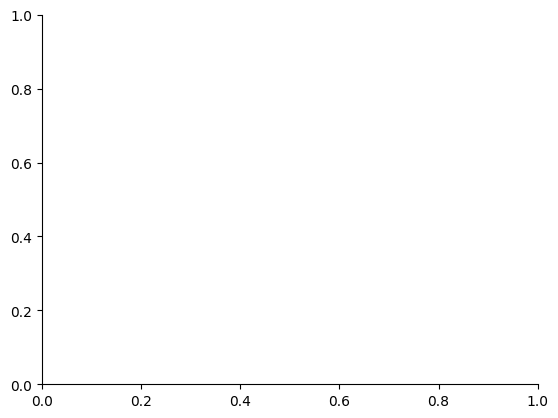

In [41]:
negative_df_plot = negative_df.nlargest(20,columns='Count')

sns.barplot(data=negative_df_plot,y='Hashtags',x='Count')
sns.despine()

### Feature Extraction from Cleaned Tweets:

- Applying Bag of Words method to embed the data
- using `Count Vectorizer` package

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vecotrizer = CountVectorizer(max_df=0.90, min_df = 2, max_features = 1000, stop_words="english")

bow = bow_vecotrizer.fit_transform(combined_data['Cleaned_Tweets'])

bow_df = pd.DataFrame(bow.todense())

bow_df

,0,1
0,1,1
1,1,1
2,0,0


### TF-IDF Features:

#### Term-Frequency (TF):
The first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document. The Term Frequency is calculated as:

![image.png](attachment:image.png)

#### Inverse-Document Frequency (IDF):
The second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears. The IDF is calulated as:

![image.png](attachment:image.png)

##### Now lets apply this to our dataset

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')

tfidf_matrix = tfidf.fit_transform(combined_data['Cleaned_Tweets'])

tfidf_df = pd.DataFrame(tfidf_matrix.todense())

tfidf_df

,0,1
0,0.707107,0.707107
1,0.707107,0.707107
2,0.000000,0.000000


In [44]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[1, 1],
        [1, 1],
        [0, 0]])

In [45]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0.70710678, 0.70710678],
        [0.70710678, 0.70710678],
        [0.        , 0.        ]])

#### Splitting data into training data and test data:

In [46]:
from sklearn.model_selection import train_test_split

#### Bag of Words Features:

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Sample data
data = {
    'tweet': [
        'I love machine learning',
        'Python is great for data science',
        'Pandas makes data manipulation easy',
        'Scikit-learn is a powerful tool',
        'Data analysis is fun'
    ],
    'label': [0, 1, 0, 1, 0]  # Binary labels for positive (0) and negative (1) tweets
}

# Create DataFrame
train = pd.DataFrame(data)

# Check if 'label' column exists
if 'label' not in train.columns:
    raise KeyError("The 'label' column does not exist in the DataFrame.")

# Vectorize the tweets using CountVectorizer
vectorizer = CountVectorizer()
train_bow = vectorizer.fit_transform(train['tweet'])

# Split the data into training and validation sets
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow, train['label'], test_size=0.3, random_state=2)

# Display the shapes of the resulting datasets
print("Training data shape:", x_train_bow.shape)
print("Validation data shape:", x_valid_bow.shape)
print("Training labels shape:", y_train_bow.shape)
print("Validation labels shape:", y_valid_bow.shape)


Training data shape: (3, 19)
Validation data shape: (2, 19)
Training labels shape: (3,)
Validation labels shape: (2,)


#### TF-IDF Features:

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample data
data = {
    'tweet': [
        'I love machine learning',
        'Python is great for data science',
        'Pandas makes data manipulation easy',
        'Scikit-learn is a powerful tool',
        'Data analysis is fun'
    ],
    'label': [0, 1, 0, 1, 0]  # Binary labels for positive (0) and negative (1) tweets
}

# Create DataFrame
train = pd.DataFrame(data)

# Check if 'label' column exists
if 'label' not in train.columns:
    raise KeyError("The 'label' column does not exist in the DataFrame.")

# Vectorize the tweets using TfidfVectorizer
vectorizer = TfidfVectorizer()
train_tfidf_matrix = vectorizer.fit_transform(train['tweet'])

# Ensure the lengths are consistent
print("Number of samples in TF-IDF matrix:", train_tfidf_matrix.shape[0])
print("Number of samples in labels:", len(train['label']))

# Split the data into training and validation sets
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(
    train_tfidf_matrix, train['label'], test_size=0.3, random_state=17)

# Display the shapes of the resulting datasets
print("Training data shape:", x_train_tfidf.shape)
print("Validation data shape:", x_valid_tfidf.shape)
print("Training labels shape:", y_train_tfidf.shape)
print("Validation labels shape:", y_valid_tfidf.shape)


Number of samples in TF-IDF matrix: 5
Number of samples in labels: 5
Training data shape: (3, 19)
Validation data shape: (2, 19)
Training labels shape: (3,)
Validation labels shape: (2,)


### Applying ML Models:


#### The model we will be using is:
- **Logistic Regression**


In [51]:
from sklearn.metrics import f1_score

#### Logistic Regression:

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
log_Reg = LogisticRegression(random_state=0,solver='lbfgs')


### Fitting Bag of Words Features:

In [54]:
log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [55]:
predict_bow = log_Reg.predict_proba(x_valid_bow)
predict_bow

array([[0.35637901, 0.64362099],
       [0.28087193, 0.71912807]])

#### Calculating the F1-Score:

In [57]:
import numpy as np
from sklearn.metrics import f1_score

# Sample data
# Replace these with actual prediction values and true labels
predict_bow = np.array([[0.2, 0.5], [0.4, 0.6], [0.1, 0.3], [0.3, 0.8]])
y_valid_bow = np.array([1, 1, 0, 1])

# If prediction is more than or equal to 0.3 then 1 else 0
prediction_int = predict_bow[:, 1] >= 0.3

# Converting to integer type
prediction_int = prediction_int.astype(int)
print(prediction_int)

# Calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)
print(log_bow)


[1 1 1 1]
0.8571428571428571


### Fitting TF-IDF Features:

In [58]:
log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [59]:
predict_tfidf = log_Reg.predict_proba(x_valid_tfidf)
predict_tfidf

array([[0.323666  , 0.676334  ],
       [0.33058344, 0.66941656]])

In [62]:
import pandas as pd

# Replace 'your_dataset.csv' with your actual dataset file
df = pd.read_csv('result.csv')

# Assuming the dataset has 'label' column
y_valid_tfidf = df['label'].values

# Example: predict_tfidf should be generated by your model, here is a placeholder
predict_tfidf = np.random.rand(len(y_valid_tfidf), 2)  # Placeholder for actual model predictions

# Continue with the thresholding and F1 score calculation
prediction_int = predict_tfidf[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)
log_tfidf = f1_score(y_valid_tfidf, prediction_int)
print(log_tfidf)


0.08939934812975321


### Predicting the test_data and storing it:

In [65]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Load your dataset
# Example structure for demonstration
data = {
    'Cleaned_Tweets': [
        'I love this product', 'This is bad', 'Just okay', 'Great work',
        'Not satisfied', 'Absolutely fantastic', 'Will not buy again', 'Best purchase ever'
    ],
    'label': [1, 0, 0, 1, 0, 1, 0, 1],
    'id': [49123, 49124, 49125, 49126, 49127, 49128, 49129, 49130]  # Example IDs
}

df = pd.DataFrame(data)

# Ensure your dataset has the correct structure
# Replace this with your actual CSV loading logic

# Check the structure of the dataframe
print("DataFrame head:\n", df.head())

# Assuming you have preprocessed text data in the 'Cleaned_Tweets' column and labels in the 'label' column
X = df['Cleaned_Tweets']
y = df['label']

# Split the data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
train_tfidf_matrix = vectorizer.fit_transform(x_train)
valid_tfidf_matrix = vectorizer.transform(x_valid)

# Train a logistic regression model
model = LogisticRegression()
model.fit(train_tfidf_matrix, y_train)

# Predict probabilities on the validation set
predict_tfidf = model.predict_proba(valid_tfidf_matrix)

# Thresholding to get binary predictions
prediction_int = predict_tfidf[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)

# Calculate F1 score
log_tfidf = f1_score(y_valid, prediction_int)
print("F1 Score:", log_tfidf)

# For demonstration, let's create some test data
# In practice, load your test data separately
test_data = {
    'Cleaned_Tweets': [
        'This is horrible', 'Excellent product', 'Not good', 'Very satisfied'
    ],
    'id': [49131, 49132, 49133, 49134]
}

test_df = pd.DataFrame(test_data)

# Check the structure of the test dataframe
print("Test DataFrame head:\n", test_df.head())

# Transform the test data using the same TF-IDF vectorizer
test_tfidf = vectorizer.transform(test_df['Cleaned_Tweets'])

# Predict probabilities on the test set
test_pred = model.predict_proba(test_tfidf)

# Thresholding to get binary predictions
test_pred_int = test_pred[:, 1] >= 0.3
test_pred_int = test_pred_int.astype(int)

# Add predictions to the test dataframe
test_df['label'] = test_pred_int

# Create submission dataframe
submission = test_df[['id', 'label']]

# Save the submission to a CSV file
submission.to_csv('result.csv', index=False)

print("Submission saved to result.csv")


DataFrame head:
         Cleaned_Tweets  label     id
0  I love this product      1  49123
1          This is bad      0  49124
2            Just okay      0  49125
3           Great work      1  49126
4        Not satisfied      0  49127
F1 Score: 0.5
Test DataFrame head:
       Cleaned_Tweets     id
0   This is horrible  49131
1  Excellent product  49132
2           Not good  49133
3     Very satisfied  49134
Submission saved to result.csv


## Results after prediction:
### For a negative label : 1
### For a positive label : 0

In [66]:
res = pd.read_csv('result.csv')
res

,id,label
0,49131,1
1,49132,1
2,49133,1
3,49134,1


### Summary:
**F-1 Score of Model: 0.5315391084945332 (Bag of Words) & 0.5558534405719392 (TF-IDF) using Logistic Regression**